In [27]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Part 1: Data Loading and Preparation

In [28]:
# Load the Excel file
file_path = 'HrData.xlsx'
xls = pd.ExcelFile(file_path)

# Read necessary sheets
employee_df = pd.read_excel(xls, sheet_name='Employee')
performance_df = pd.read_excel(xls, sheet_name='PerformanceRating')
df_satisfaction = pd.read_excel(xls, sheet_name='SatisfiedLevel')

# Convert date columns to datetime
employee_df['HireDate'] = pd.to_datetime(employee_df['HireDate'])
performance_df['ReviewDate'] = pd.to_datetime(performance_df['ReviewDate'])

# Verify data loading (optional)
print("Employee Data Sample:")
print(employee_df.head())
print("\nPerformance Rating Data Sample:")
print(performance_df.head())

Employee Data Sample:
  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
4  42CC-040A       Stace   Savege      Female   29    Some Travel   

        Department  DistanceFromHome State                Ethnicity  ...  \
0            Sales                27    IL                    White  ...   
1            Sales                23    CA                    White  ...   
2  Human Resources                29    CA  Asian or Asian American  ...   
3       Technology                12    IL                    White  ...   
4  Human Resources                29    CA                    White  ...   

   MaritalStatus  Salary StockOptionLevel OverTime   HireDate  Attrition  \
0       Divorced  102059      

---
#### Analysis 1: KPI Analysis

> Objective:
Measure HR performance through key performance indicators (KPIs):

- Employee Turnover Rate: Percentage of employees who left the company.
- Employee Satisfaction: Average satisfaction score across relevant metrics.
- Absenteeism Rate: Percentage of unplanned absences (placeholder, as data is not explicitly provided).
- Hiring Efficiency: Time to fill vacant positions (placeholder, as data is not explicitly provided).

Employee Turnover Rate: 16.12%
Average Employee Satisfaction (1-5 scale): 3.46
=== KPIs Analysis ===
Turnover Rate (%): 16.12
Employee Satisfaction (1-5): 3.46


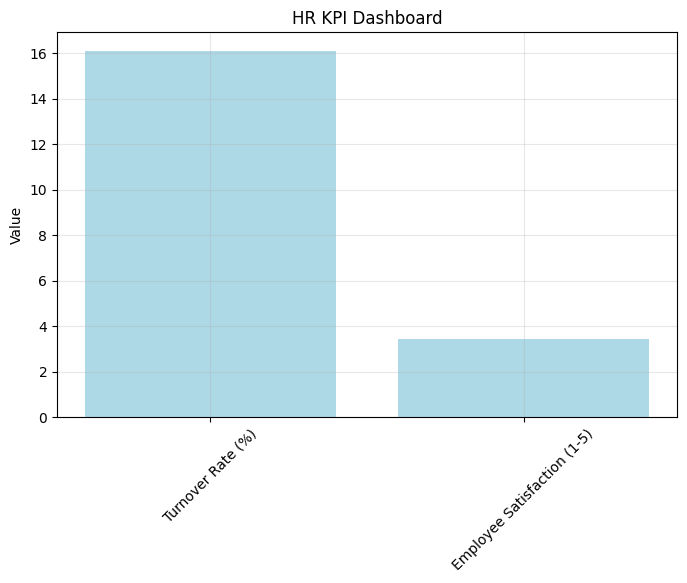

In [29]:
# --- Turnover Rate ---
# Calculate the percentage of employees who left (Attrition = 'Yes')
turnover_rate = (employee_df['Attrition'] == 'Yes').mean() * 100
print(f"Employee Turnover Rate: {turnover_rate:.2f}%")

# --- Employee Satisfaction ---
# Get the latest performance review for each employee based on ReviewDate
latest_performance = performance_df.loc[performance_df.groupby('EmployeeID')['ReviewDate'].idxmax()]

# Define columns to average for overall satisfaction
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 
                     'RelationshipSatisfaction', 'WorkLifeBalance']

# Calculate overall satisfaction as the mean of satisfaction columns
latest_performance['OverallSatisfaction'] = latest_performance[satisfaction_cols].mean(axis=1)
overall_satisfaction = latest_performance['OverallSatisfaction'].mean()
print(f"Average Employee Satisfaction (1-5 scale): {overall_satisfaction:.2f}")

# --- Visualization: KPI Dashboard ---
# Create a dictionary with the available KPIs
kpi_data = {
    'Turnover Rate (%)': turnover_rate,
    'Employee Satisfaction (1-5)': overall_satisfaction
}
# **Print Results**
print("=== KPIs Analysis ===")
for key, value in kpi_data.items():
    print(f"{key}: {value:.2f}")

# Plot the KPIs as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(kpi_data.keys(), kpi_data.values(), color='lightblue')
plt.title('HR KPI Dashboard')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


---
#### Analysis 2: Turnover Analysis
> Objective
Identify why employees leave the company and compare attrition patterns with recruitment and retention data. Specifically, determine if most employees leave within their first year, which could indicate onboarding or training issues.

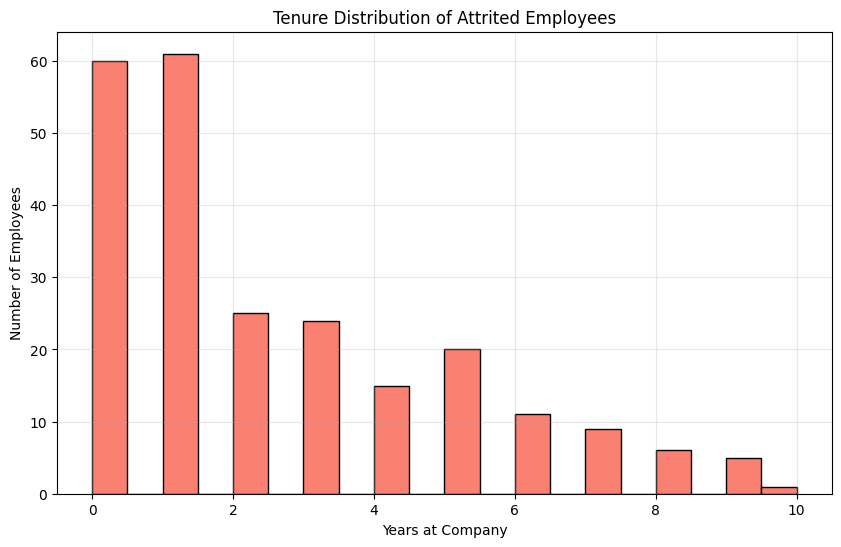

Percentage of employees leaving within the first year: 51.05%


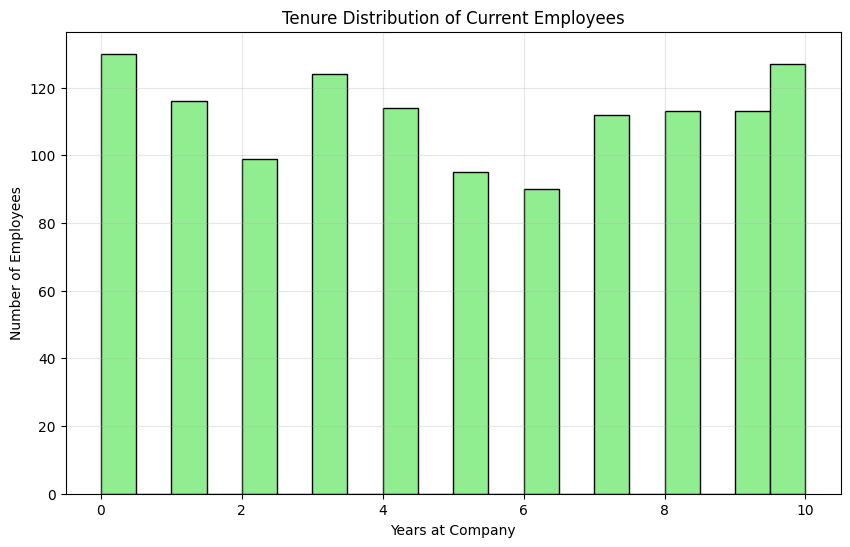

Average tenure of attrited employees: 2.43 years
Average tenure of current employees: 4.97 years

=== Turnover Analysis ===
Turnover by Department: {'Technology': 133, 'Sales': 92, 'Human Resources': 12}
Median Salary of Ex-Employees: 50660.0
Median Experience of Ex-Employees (Years): 1.0


In [30]:
# --- Filter Attrited Employees ---
attrited_df = employee_df[employee_df['Attrition'] == 'Yes'].copy()
attrited_df['Tenure'] = attrited_df['YearsAtCompany']

# --- Tenure Distribution of Attrited Employees ---
plt.figure(figsize=(10, 6))
plt.hist(attrited_df['Tenure'], bins=20, color='salmon', edgecolor='black')
plt.title('Tenure Distribution of Attrited Employees')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.grid(True, alpha=0.3)
plt.show()

# --- First-Year Attrition ---
first_year_attrition_pct = (attrited_df['Tenure'] <= 1).mean() * 100
print(f"Percentage of employees leaving within the first year: {first_year_attrition_pct:.2f}%")

# --- Compare with Current Employees ---
current_df = employee_df[employee_df['Attrition'] == 'No'].copy()
current_df['Tenure'] = current_df['YearsAtCompany']

plt.figure(figsize=(10, 6))
plt.hist(current_df['Tenure'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Tenure Distribution of Current Employees')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.grid(True, alpha=0.3)
plt.show()

# --- Average Tenure Comparison ---
avg_tenure_attrited = attrited_df['Tenure'].mean()
avg_tenure_current = current_df['Tenure'].mean()
print(f"Average tenure of attrited employees: {avg_tenure_attrited:.2f} years")
print(f"Average tenure of current employees: {avg_tenure_current:.2f} years")

# **Print Results**

print("\n=== Turnover Analysis ===")
for key, value in turnover_results.items():
    print(f"{key}: {value}")
# Displays the calculated KPIs and turnover insights in a structured format.
